# Importar arquivos

In [3]:
import pickle
with open('data/processed/loan_status.pkl','rb') as f:
    x_treino,y_treino,x_teste,y_teste = pickle.load(f)

# Analise

## Instanciar classificadores

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

classificadores = {
    'NB'  : GaussianNB(),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'SVM' : SVC(),
    'DT'  : DecisionTreeClassifier(),
    'RF'  : RandomForestClassifier()
}

## Treinar classificadores

In [5]:
import pandas as pd
data_results = pd.DataFrame()
data_results['algoritmos'] = classificadores.keys()
data_results.head()

In [6]:
import time 

tempo_treinamento = []

for clf in classificadores.keys():
    
    start_time = time.process_time()
    classificadores[clf].fit(x_treino,y_treino)
    tempo_treinamento.append(time.process_time() - start_time)

data_results['tempo_treinamento'] = tempo_treinamento
data_results.head() 

## Avaliação

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
acc_list  = []
prec_list = []
rec_list  = []
time_list = []

for clf in classificadores.keys():
    
    start_time = time.process_time()
    predicoes = classificadores[clf].predict(x_teste)
    time_list.append(time.process_time() - start_time)
    
    acc_list.append(accuracy_score(y_teste,predicoes))
    prec_list.append(precision_score(y_teste,predicoes,average='macro'))
    rec_list.append(recall_score(y_teste,predicoes,average='macro'))

data_results['accuracy']        = acc_list
data_results['precision']       = prec_list
data_results['recall']          = rec_list
data_results['tempo_predicoes'] = time_list
data_results.head()
    
    

## Comparar

<AxesSubplot:xlabel='recall', ylabel='algoritmos'>

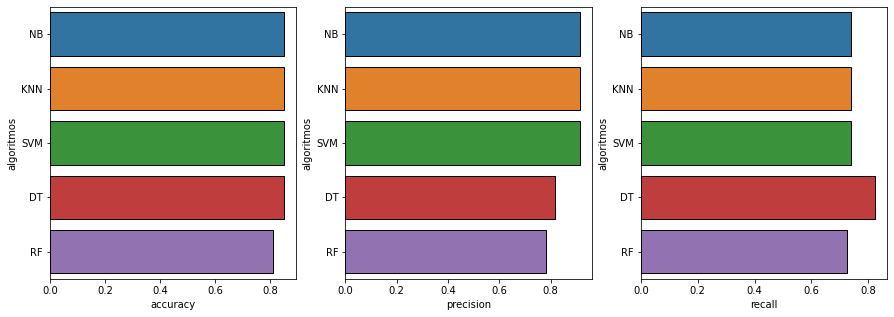

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))

sns.barplot(y='algoritmos', x='accuracy', data=data_results, ax=ax[0],ec='k',orient='h')
sns.barplot(y='algoritmos', x='precision', data=data_results, ax=ax[1],ec='k',orient='h')
sns.barplot(y='algoritmos', x='recall', data=data_results, ax=ax[2],ec='k',orient='h')

### Matriz de confusao

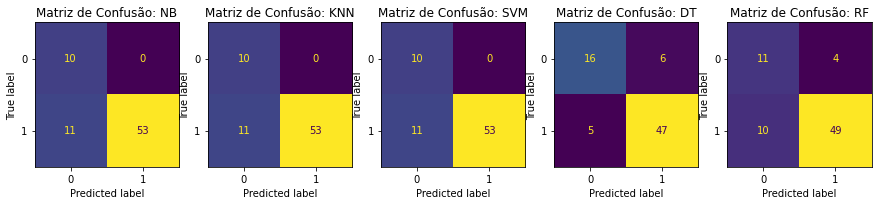

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,5))

for idx,clf in enumerate(classificadores.keys()):
    cf_matrix = confusion_matrix(classificadores[clf].predict(x_teste), y_teste)
    disp      = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=ax[idx],colorbar=False)
    ax[idx].set_title(f"Matriz de Confusão: {clf}")

In [17]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_teste,predicoes,zero_division=0))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.52      0.61        21
           1       0.83      0.92      0.88        53

    accuracy                           0.81        74
   macro avg       0.78      0.72      0.74        74
weighted avg       0.80      0.81      0.80        74

